# Etude de cohorte

Une ***cohort*** est un groupe de personnes partageant des caractéristiques communes au cours d’une période spécifique.


L’analyse de cohortes est une méthode qui permet d’analyser et d’anticiper le comportement de ses clients et ainsi de mieux les comprendre. On peut, par exemple, déterminer le revenu qu’ils génèrent actuellement, la date de leur prochaine commande, et donc le chiffre d’affaires potentiel qu’ils généreront dans les prochaines années. Une analyse de cohortes est essentielle pour déterminer la « fameuse » Life-Time Value de ses clients.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
pd.set_option('display.max_rows', 200)

In [2]:
df = pd.read_csv("clean_dataset.csv", index_col = 0)

C:\Users\chris\anaconda3\envs\chris-env\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
#Transform MOIS_VENTE values into datetime

#df['MOIS_VENTE'] = df['MOIS_VENTE'].apply(lambda x: datetime.date(2020, x, 1))

In [3]:
grouping = df.groupby('CLI_ID')['MOIS_VENTE']

In [4]:
df['MOIS_ACQUISITION'] = grouping.transform('min')

In [ ]:
# Extract Cohort Index si MOIS_VENTE en datetime

# invoice_month = pd.DatetimeIndex(df['MOIS_VENTE']).month
# cohort_month = pd.DatetimeIndex(df['MOIS_ACQUISITION']).month
# months_diff = invoice_month - cohort_month
# df['CohortIndex'] = months_diff + 1

In [5]:
#Extract Cohort Index
months_diff = df['MOIS_VENTE'] - df['MOIS_ACQUISITION']
df['INDEX_COHORTE'] = months_diff + 1

In [6]:
grouping = df.groupby(['MOIS_ACQUISITION', 'INDEX_COHORTE'])
cohort_data = grouping['CLI_ID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index = 'MOIS_ACQUISITION',columns = 'INDEX_COHORTE', values = 'CLI_ID')

In [7]:
cohort_counts

INDEX_COHORTE,1,2,3,4,5,6,7,8,9,10,11,12
MOIS_ACQUISITION,,,,,,,,,,,,
1,211942.0,53282.0,61094.0,62906.0,64143.0,73151.0,73761.0,59780.0,67437.0,55633.0,60578.0,72386.0
2,94723.0,21125.0,23053.0,25102.0,28860.0,27957.0,23159.0,26132.0,20869.0,23182.0,28722.0,NaN
3,86924.0,15003.0,17659.0,21639.0,21412.0,16796.0,18895.0,15149.0,16995.0,21553.0,NaN,NaN
4,65766.0,11226.0,14484.0,15134.0,11733.0,12880.0,10382.0,11848.0,15456.0,NaN,NaN,NaN
5,61183.0,11008.0,11513.0,9004.0,10051.0,8218.0,9370.0,13068.0,NaN,NaN,NaN,NaN
6,64393.0,10848.0,8538.0,10074.0,7846.0,9076.0,12578.0,NaN,NaN,NaN,NaN,NaN
7,67457.0,7755.0,8067.0,7164.0,8213.0,11549.0,NaN,NaN,NaN,NaN,NaN,NaN
8,39677.0,5115.0,4401.0,4829.0,6827.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,40121.0,5357.0,5319.0,7433.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On considère la date d'acquisition d'un client à partir de sa facture la plus ancienne. Cela est surement faussé étant donné qu'il soit possible qu'un client ait fait un achat antérieurement à Janvier 2020.


In [8]:
# Taux de rétention des cohortes

cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis = 0)
retention.round(3) * 100

INDEX_COHORTE,1,2,3,4,5,6,7,8,9,10,11,12
MOIS_ACQUISITION,,,,,,,,,,,,
1,100.0,25.1,28.8,29.7,30.3,34.5,34.8,28.2,31.8,26.2,28.6,34.2
2,100.0,22.3,24.3,26.5,30.5,29.5,24.4,27.6,22.0,24.5,30.3,NaN
3,100.0,17.3,20.3,24.9,24.6,19.3,21.7,17.4,19.6,24.8,NaN,NaN
4,100.0,17.1,22.0,23.0,17.8,19.6,15.8,18.0,23.5,NaN,NaN,NaN
5,100.0,18.0,18.8,14.7,16.4,13.4,15.3,21.4,NaN,NaN,NaN,NaN
6,100.0,16.8,13.3,15.6,12.2,14.1,19.5,NaN,NaN,NaN,NaN,NaN
7,100.0,11.5,12.0,10.6,12.2,17.1,NaN,NaN,NaN,NaN,NaN,NaN
8,100.0,12.9,11.1,12.2,17.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100.0,13.4,13.3,18.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Moyenne prix d'un article par cohorte

grouping = df.groupby(['MOIS_ACQUISITION', 'INDEX_COHORTE'])
cohort_data = grouping['PRIX_NET'].mean()
cohort_data = cohort_data.reset_index()
average_quantity = cohort_data.pivot(index='MOIS_ACQUISITION', columns='INDEX_COHORTE', values='PRIX_NET')
average_quantity.round(1)

INDEX_COHORTE,1,2,3,4,5,6,7,8,9,10,11,12
MOIS_ACQUISITION,,,,,,,,,,,,
1,5.5,6.7,6.4,6.3,7.2,5.8,5.7,5.4,6.1,6.4,6.4,5.4
2,6.9,6.4,6.3,7.4,5.9,5.8,5.4,6.1,6.4,6.6,5.5,NaN
3,6.4,6.2,7.1,5.8,5.7,5.4,6.1,6.3,6.5,5.4,NaN,NaN
4,6.4,6.7,5.7,5.7,5.4,6.0,6.2,6.4,5.3,NaN,NaN,NaN
5,6.9,5.7,5.6,5.3,5.8,6.1,6.3,5.4,NaN,NaN,NaN,NaN
6,5.8,5.5,5.2,5.7,5.8,6.3,5.2,NaN,NaN,NaN,NaN,NaN
7,5.7,5.1,5.7,5.9,6.4,5.3,NaN,NaN,NaN,NaN,NaN,NaN
8,5.5,5.5,5.7,6.2,5.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6.1,5.5,6.0,5.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


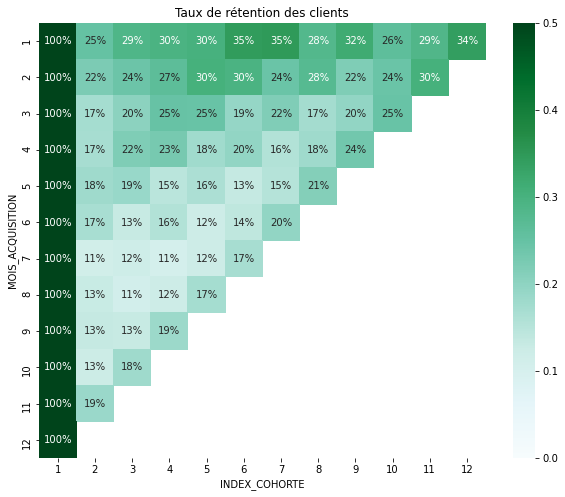

In [10]:
plt.figure(figsize=(10,8))
plt.title('Taux de rétention des clients')
sns.heatmap(data=retention, annot=True, fmt='.0%',vmin=0.0,vmax=0.5,cmap='BuGn')
plt.show()

# Segmentation RFM (Récence, Fréquence, Montant)

La méthode de segmentation RFM permet un classement des clients en fonction de leurs habitudes d'achat. On peut ainsi optimiser une stratégie marketing en fonction de nos clients.

Le classement RFM se fait en fonction de 3 critères :

- Récence : date du dernier achat ou dernier contact client
- Fréquence : fréquence des achats sur une période de référence donnée
- Montant : somme des achats cumulés sur cette période

## Montant

Nous allons classé les clients en fonction du montant total de leur dépense sur notre site. Chaque quartile représente un groupe de 25% de nos clients. Ainsi le quartile 1 représente les 25% de clients qui dépensent le moins et le quartile 4 représente les 25% de clients qui dépensent le plus.

In [11]:
cli_total_spent = df.groupby('CLI_ID').agg(sum)['PRIX_NET']

In [12]:
total_spent_quartile = pd.qcut(cli_total_spent, q=4, labels=range(1,5))
total_spent_quartile

CLI_ID
1490281      2
13290776     3
20163348     1
20200041     1
20561854     1
            ..
997048745    2
997048751    2
997048769    4
997048777    4
997385337    4
Name: PRIX_NET, Length: 853511, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

## Récence

Nous allons classés les clients en fonction du temps depuis leur dernier achat.


In [13]:
cli_last_purchase = df[['CLI_ID', 'MOIS_VENTE']].groupby('CLI_ID').agg('max')

In [70]:
cli_recency = 12 - cli_last_purchase

In [49]:
recency_quartile = pd.qcut(cli_recency['MOIS_VENTE'], q=3, labels=['ACTIVE','OCCASIONNEL','INACTIVE'])

In [16]:
recency_quartile

CLI_ID
1490281      OCCASIONNEL
13290776          ACTIVE
20163348        INACTIVE
20200041        INACTIVE
20561854        INACTIVE
                ...     
997048745    OCCASIONNEL
997048751    OCCASIONNEL
997048769         ACTIVE
997048777    OCCASIONNEL
997385337         ACTIVE
Name: MOIS_VENTE, Length: 853511, dtype: category
Categories (3, object): ['ACTIVE' < 'OCCASIONNEL' < 'INACTIVE']

## Fréquence

La fréquence représente le nombre de commande que le client a passé ces 12 derniers mois.

In [17]:
cli_frequency = df[['CLI_ID', 'TICKET_ID']].groupby('CLI_ID').agg(pd.Series.nunique)

In [22]:
cli_frequency

,TICKET_ID
CLI_ID,
1490281,1
13290776,2
20163348,1
20200041,1
20561854,1
...,...
997048745,1
997048751,2
997048769,3


In [18]:
frequency_quartile = pd.qcut(cli_frequency['TICKET_ID'], q=2, labels=['OCCASIONNEL','REGULIER'])

In [19]:
frequency_quartile

CLI_ID
1490281      OCCASIONNEL
13290776     OCCASIONNEL
20163348     OCCASIONNEL
20200041     OCCASIONNEL
20561854     OCCASIONNEL
                ...     
997048745    OCCASIONNEL
997048751    OCCASIONNEL
997048769       REGULIER
997048777       REGULIER
997385337       REGULIER
Name: TICKET_ID, Length: 853511, dtype: category
Categories (2, object): ['OCCASIONNEL' < 'REGULIER']

In [20]:
test = df[['CLI_ID', 'TICKET_ID']].groupby('CLI_ID').agg('count')

In [21]:
pd.Data

,TICKET_ID
CLI_ID,
1490281,5
13290776,9
20163348,1
20200041,2
20561854,3
...,...
997048745,4
997048751,5
997048769,10


In [71]:
data = {'RECENCE': cli_recency['MOIS_VENTE'], 'FREQUENCE': cli_frequency['TICKET_ID'], 'MONTANT': cli_total_spent }
RFM_df = pd.DataFrame(data=data, index = cli_recency.index )

In [30]:
RFM_df.to_csv('RFM.csv', index=False)

In [72]:
RFM_df

,RECENCE,FREQUENCE,MONTANT
CLI_ID,,,
1490281,2,1,18.40
13290776,0,2,55.50
20163348,11,1,7.45
20200041,11,1,6.70
20561854,9,1,7.05
...,...,...,...
997048745,4,1,19.80
997048751,2,2,28.80
997048769,0,3,72.65


In [40]:
print(f"Le montant de dépense moyen par client sur l'année est de {np.mean(RFM_df['MONTANT']):.2f}€.")
print(f"En moyenne la date du dernier achat du client remonte à {np.mean(RFM_df['RECENCE']):.2f} mois.")
print(f"En moyenne un client commande {np.mean(RFM_df['FREQUENCE']):.2f} fois par an.")

Le montant de dépense moyen par client sur l'année est de 50.68€.
En moyenne la date du dernier achat du client remonte à 3.18 mois.
En moyenne un client commande 3.20 fois par an.


N'ayant pas beaucoup de mois ni de frequence d'achat on décide de segmenter ces deux variables en 2 segments.
Le montant quant à lui est segmenté en 4 segments


In [79]:
r_quartiles = pd.qcut(RFM_df['RECENCE'], 2, range(2,0,-1))
f_quartiles = pd.qcut(RFM_df['FREQUENCE'], 2, range(1,3))
m_quartiles = pd.qcut(RFM_df['MONTANT'], 4, range(1,5))
RFM_df['R'] = r_quartiles
RFM_df['F'] = f_quartiles.values
RFM_df['M'] = m_quartiles.values

In [80]:
RFM_df.head()

,RECENCE,FREQUENCE,MONTANT,R,F,M
CLI_ID,,,,,,
1490281,2,1,18.40,2,1,2
13290776,0,2,55.50,2,1,3
20163348,11,1,7.45,1,1,1
20200041,11,1,6.70,1,1,1
20561854,9,1,7.05,1,1,1


In [86]:
def join_rfm(x): return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))

In [87]:
RFM_df['RFM_SEGMENT'] = RFM_df.apply(join_rfm, axis=1)
RFM_df['RFM_SCORE'] = RFM_df[['R','F','M']].sum(axis=1)

In [88]:
RFM_df

,RECENCE,FREQUENCE,MONTANT,R,F,M,RFM_SEGMENT,RFM_SCORE
CLI_ID,,,,,,,,
1490281,2,1,18.40,2,1,2,212,5
13290776,0,2,55.50,2,1,3,213,6
20163348,11,1,7.45,1,1,1,111,3
20200041,11,1,6.70,1,1,1,111,3
20561854,9,1,7.05,1,1,1,111,3
...,...,...,...,...,...,...,...,...
997048745,4,1,19.80,1,1,2,112,4
997048751,2,2,28.80,2,1,2,212,5
997048769,0,3,72.65,2,2,4,224,8


In [89]:
RFM_df.to_csv('RFM_data.csv', index=False)

## Analyse des segments RFM

In [90]:
#Largest RFM segment
RFM_df.groupby('RFM_SEGMENT').size().sort_values(ascending=False)[:10]

RFM_SEGMENT
224    163868
111    144638
112    107133
223     85163
211     63127
212     62325
113     53267
213     38842
123     36126
124     31443
dtype: int64

On se rend compte que les segments les plus représentés sont les clients regulier, actif et avec un montant d'achat assez conséquent.

Le deuxieme segment le plus représenté est celui des clients occasionnels, inactifs et avec un montant d'achat annuel bas.

In [92]:
RFM_df.groupby('RFM_SCORE').agg({
    'RECENCE': 'mean',
    'FREQUENCE': 'mean',
    'MONTANT': ['mean', 'count']
}).round(1)

RECENCE FREQUENCE MONTANT        
             mean      mean    mean   count
RFM_SCORE                                  
3             6.7       1.1     7.4  144638
4             4.4       1.3    15.5  172530
5             3.4       1.8    28.6  135152
6             2.4       2.9    42.0  112386
7             1.5       4.4    64.7  124937
8             0.5       7.5   139.4  163868

Les clients ayant un score RFM de 3 n'ont plus acheté depuis en moyenne 6.7 mois, achète 1.1 fois par an pour un total de dépense de 7.4€.

Les clients ayant un score RFM de 8 ont commandé en moyenne les 15 derniers jours, ont une fréquence d'achat de 7.5 par an pour un montant de dépense annuel moyen de 139€

In [98]:
def segment_me(df):
    if df['RFM_SCORE'] >= 7:
        return '1. Gold'
    elif (df['RFM_SCORE'] >=5) and (df['RFM_SCORE'] <7):
        return '2. Silver'
    else:
        return '3. Bronze'

In [99]:
RFM_df['GENERAL_SEGMENT']= RFM_df.apply(segment_me, axis = 1)

In [100]:
RFM_df.groupby('GENERAL_SEGMENT').agg({
    'RECENCE': 'mean',
    'FREQUENCE': 'mean',
    'MONTANT': ['mean', 'count']
}).round(1)

RECENCE FREQUENCE MONTANT        
                   mean      mean    mean   count
GENERAL_SEGMENT                                  
1. Gold             0.9       6.2   107.1  288805
2. Silver           2.9       2.3    34.7  247538
3. Bronze           5.4       1.2    11.8  317168